[[180.         180.          91.11111111 ...   0.           0.
    0.        ]
 [141.66666667 141.66666667 141.66666667 ...  17.22222222  17.22222222
   17.22222222]
 [270.55555556 202.77777778 152.22222222 ...   7.77777778   7.77777778
    7.77777778]
 [ 67.22222222  67.22222222  67.22222222 ...   8.88888889   8.88888889
    8.88888889]
 [107.77777778 107.77777778 107.77777778 ...  20.          20.
   20.        ]]
As 5 melhores sequencias sao: [[-3.0, 5.0, 0.0], [-2.6, 4.3, -0.0], [-2.5, 4.3, -0.0], [-3.2, 5.2, 0.0], [-4.0, 6.2, 0.1]]
Os 5 melhores erros sao: [0.0, 17.222222222222282, 7.777777777777785, 8.888888888888916, 19.999999999999982]
A media dos erros e de: 10.777777777777795
O desvio padrao e de: 7.1457489736949045


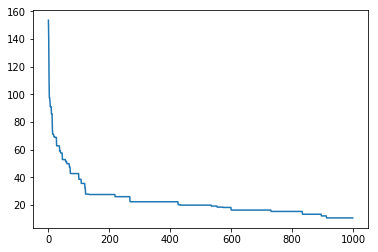

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

def genThreeFloatNumbers():
  floatNumbers=[]
  counter=0
  counter2=0

  while (counter!=3):
    floatNumbers.append(str(random.uniform(-10, 10)))
    counter+=1
  
  for num in floatNumbers:
    floatNumbers[counter2]=float((num[:num.find('.')+2]))
    counter2+=1
  

  return floatNumbers

def genFiftyLists():
  counter=0
  fiftyLists=[]
  while(counter<50):
    fiftyLists.append(genThreeFloatNumbers())
    counter+=1
  return fiftyLists

def plotGraphic(bestPerc):
  yList=[]
  acc=0
  for i in range (1000):
    for j in range (5):
        acc+=bestPerc[j][i]
    acc/=5
    yList.append(acc)
    acc=0
    
  xList=[x for x in range(1000)]
  plt.plot(xList, yList)

    
def equationsSystem():
  fiftyLists=genFiftyLists()
  approximations=[]
  counter=0
  appsAverage=0

  while(counter<50):
    approximation1=((abs(1-(3*fiftyLists[counter][0]+2*fiftyLists[counter][1]+4*fiftyLists[counter][2])))/1)*100
    approximation2=((abs(2-(fiftyLists[counter][0]+fiftyLists[counter][1]+2*fiftyLists[counter][2])))/2)*100
    approximation3=((abs(3-(4*fiftyLists[counter][0]+3*fiftyLists[counter][1]-2*fiftyLists[counter][2])))/3)*100
    appsAverage=(approximation1+approximation2+approximation3)/3

    approximations.append(appsAverage)
    counter+=1


  counter=0
  index=0
  while (counter<25):
    index=approximations.index(max(approximations))
    approximations.pop(index)
    fiftyLists.pop(index)
    counter+=1

    
  return approximations, fiftyLists

def buildFinalList():
  finalList=[]
  finalApproximations=[]
  bestList=[]
  bestApproximations=[]
  auxList=[]
  auxList2=[]
  

  index=0
  for i in range (1000):
    auxList, auxList2=equationsSystem()
    finalApproximations+=auxList
    index=finalApproximations.index(min(finalApproximations))

    bestApproximations.append(min(finalApproximations))

    finalList+=auxList2
    bestList.append(finalList[index])




  return (bestApproximations, bestList)


def doFiveTimes():
  numIterations = 1000
  numExec = 5
  numValues = 3
  bestPerc = np.zeros((numExec, numIterations))
  bestSeq= np.zeros((numExec, numIterations, numValues))
  fiveBestPerc=[]
  fiveBestSeq=[]
  for i in range(5):
    bestApproximations, bestList=buildFinalList()
    for j in range(1000):
      bestPerc[i][j]=bestApproximations[j]
      bestSeq[i][j]=bestList[j]

  index=0
  auxList=[]
  for i in range(5):
    auxList=bestPerc[i].tolist()
    index=auxList.index(min(auxList))
    fiveBestPerc.append(min(bestPerc[i]))
    fiveBestSeq.append(bestSeq[i][index].tolist())
    
  plotGraphic(bestPerc)  
  
  print(bestPerc)

  return fiveBestPerc, fiveBestSeq

def bestFiveAverage():
  fiveBestPerc, fiveBestSeq=doFiveTimes();
  average=0
  for i in range(5): average+=fiveBestPerc[i]

  average/=5
  return average, fiveBestPerc, fiveBestSeq

def standardDeviation(average, fiveBestPerc):
  stDv=0
  for i in range(5): 
    stDv+=(fiveBestPerc[i]-average)**2
  
  stDv/=5
  stDv=stDv**(0.5)
  return stDv


average, fiveBestPerc, fiveBestSeq=bestFiveAverage()
stDv=standardDeviation(average, fiveBestPerc)
print('As 5 melhores sequencias sao:', fiveBestSeq)
print('Os 5 melhores erros sao:', fiveBestPerc)
print('A media dos erros e de:', average)
print('O desvio padrao e de:', stDv)